## 🚩 Going down stairs :
| 1 | **- 🧹 [Data Cleaning](#1--🧹-data-cleaning)**                    |
|:-:|------------------------------------------ |
| 2 | **- 👨‍🔧 [Feature Enginner and Selecting](#2--👨‍🔧🛠-feature-enginner-and-selecting)** |
| 3 | **- 📊 [Visualization](#3---📊-visualization)**                    |
| 4 | **- 🥵 [Heat Map](#4---🥵-heat-map)**                         |
| 5 | **- 🎢 [Varience ThresHold](#5---🎢-variance-threshold)**               |
| 6 | **- 🎯 [SMOTE { KNN }](#6---🎯-smote--knn)**                            |
| 7 | **- 🚅 [Train](#7---🚅-train)**                            |
| 8 | **- 🐇 [observations](#7---🚅-train) 🎆**                            |


In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

import warnings
warnings.filterwarnings('ignore')

## 1- 🧹 [Data Cleaning](#1--🧹-data-cleaning)

In [184]:
# Load the xlsx file
excel_data = pd.read_excel("Data/Personal Bank Loan Classification.xlsx",sheet_name='Data')
# Read the values of the file in the dataframe
df = pd.DataFrame(excel_data)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.duplicated().sum()

0

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [188]:
df['Experience'] = df["Experience"].apply(lambda x: 0 if x < 0 else x)
print(df['Experience'].min())

0


## 2- 👨‍🔧🛠 Feature Enginner and Selecting

In [189]:
df.drop('ID',axis=1,inplace=True)

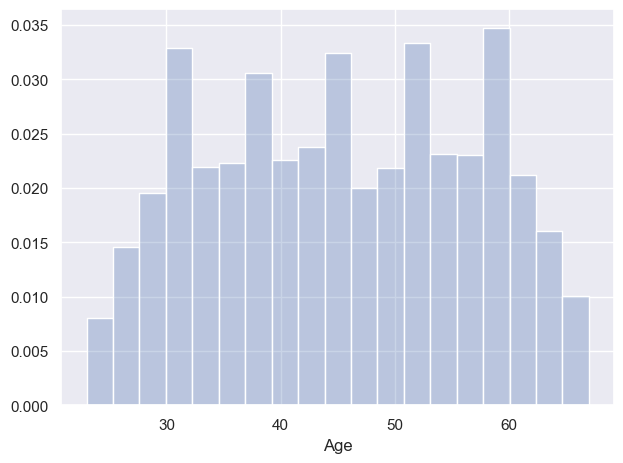

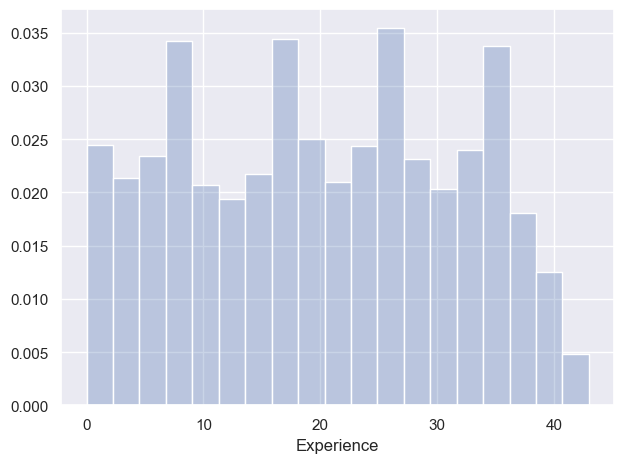

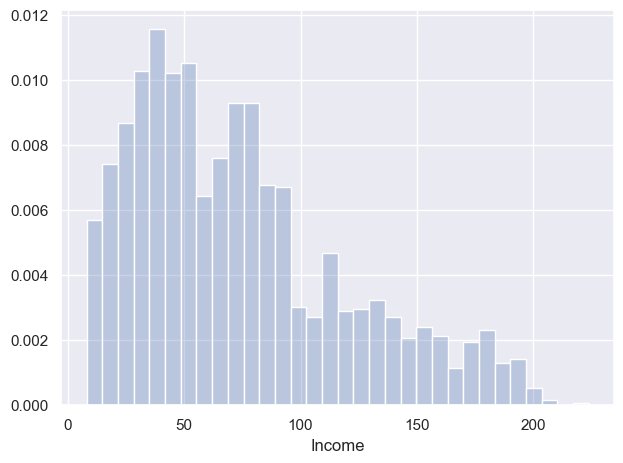

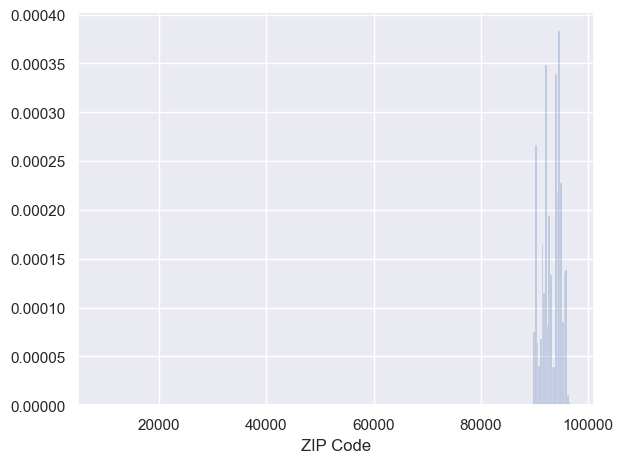

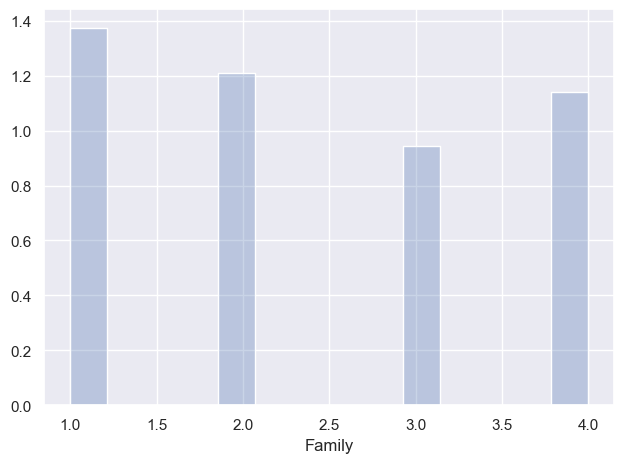

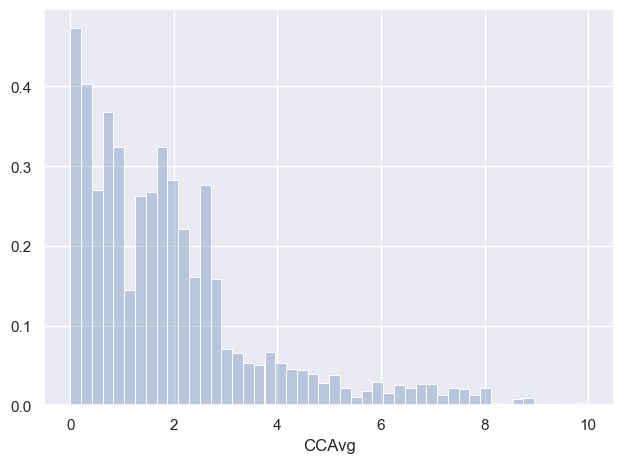

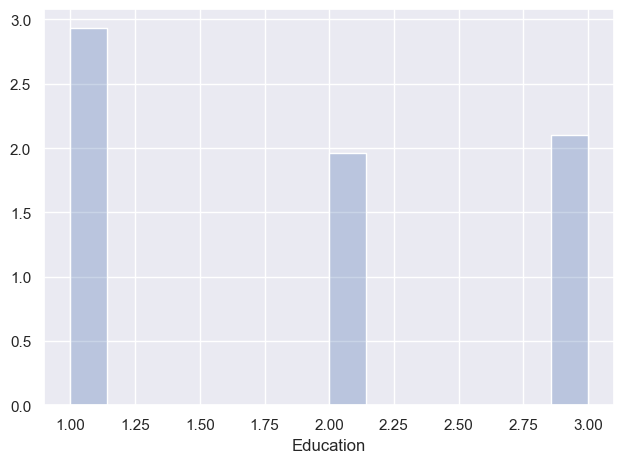

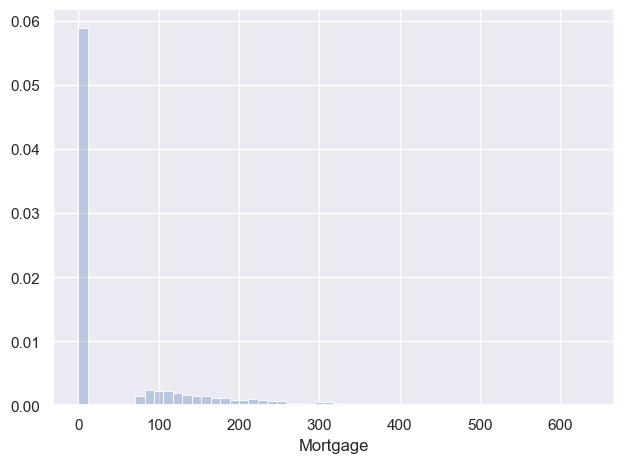

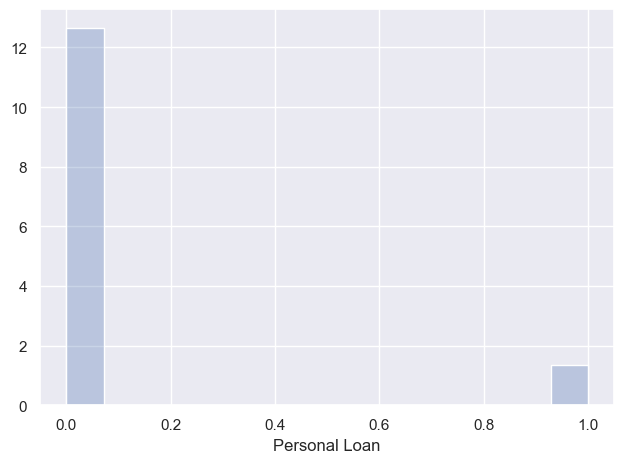

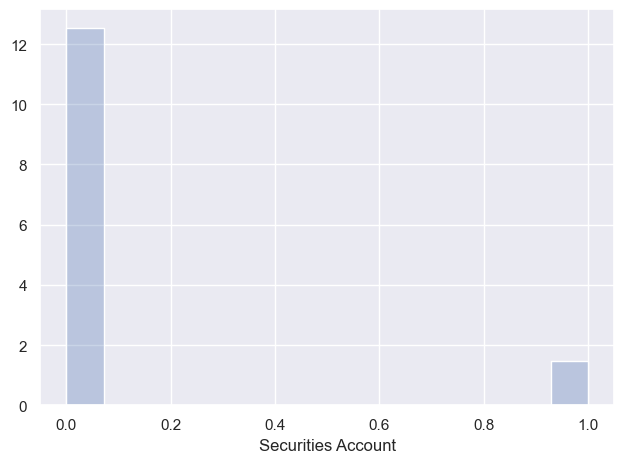

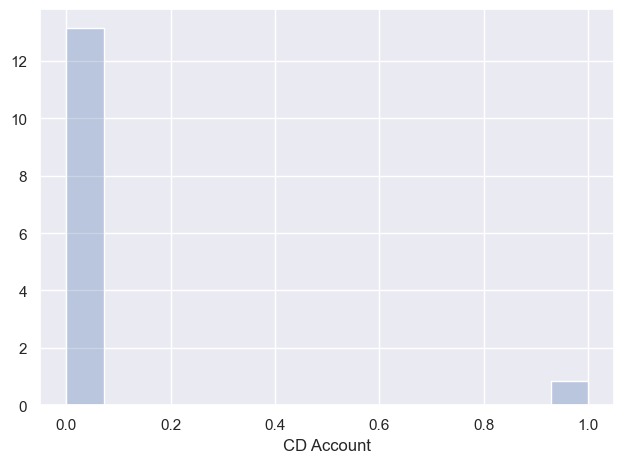

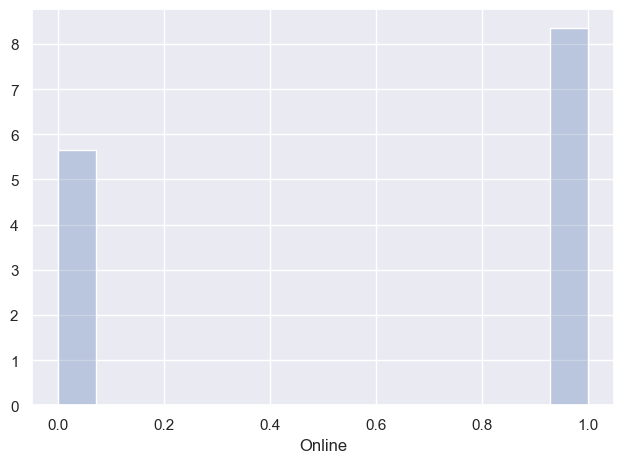

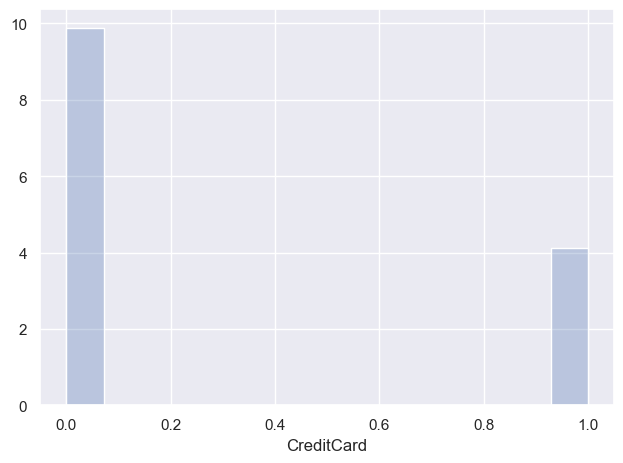

In [190]:
for i in df.columns:
    p = so.Plot(df[i])
    p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
    p2.add(so.Line(), so.KDE())
    p2.show()

*NORMMM!!!!*
- standerd scaler OR min-max => { Age, Experiecne }

- log + min-max => { income, CCAvg }

- min-max => { zip code, mortage  }

**---- lets test ---->>>> all from 0 to 1**

In [191]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
minMax = MinMaxScaler()
scaler = StandardScaler()

In [192]:
minMax.fit(df[['Experience','Age']])
df[['EXP_NORM','AGE_NORM']] = minMax.transform(df[['Experience','Age']])

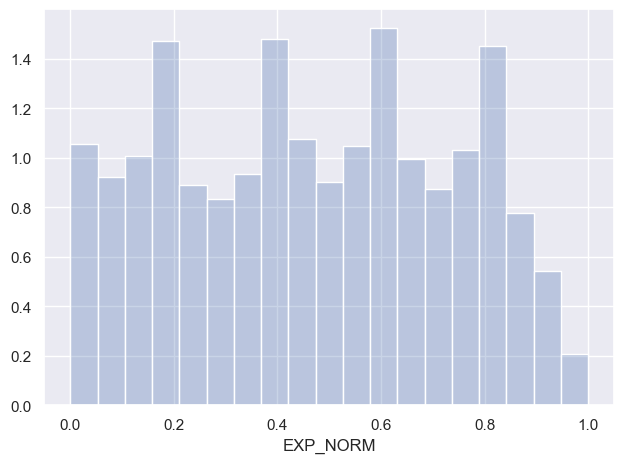

In [193]:
p = so.Plot(df['EXP_NORM'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

In [194]:
df[['NORM_Income','NORM_CCAvg']] = np.log(df[['Income','CCAvg']] + 1)
minMax.fit(df[['NORM_Income','NORM_CCAvg']])

df[['NORM_Income','NORM_CCAvg']] = minMax.transform(df[['NORM_Income','NORM_CCAvg']])

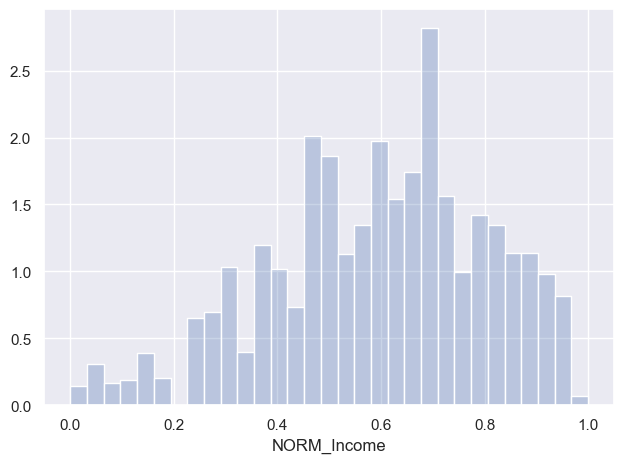

In [195]:
p = so.Plot(df['NORM_Income'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

In [196]:
minMax.fit(df[['Mortgage','ZIP Code']])
df[['NORM_Mortgage','NORM_ZIP_Code']] = minMax.transform(df[['Mortgage','ZIP Code']])
#df[['NORM_Mortgage','NORM_ZIP_Code']] = (df[['Mortgage','ZIP Code']]) / df[['Mortgage','ZIP Code']].wqmax()


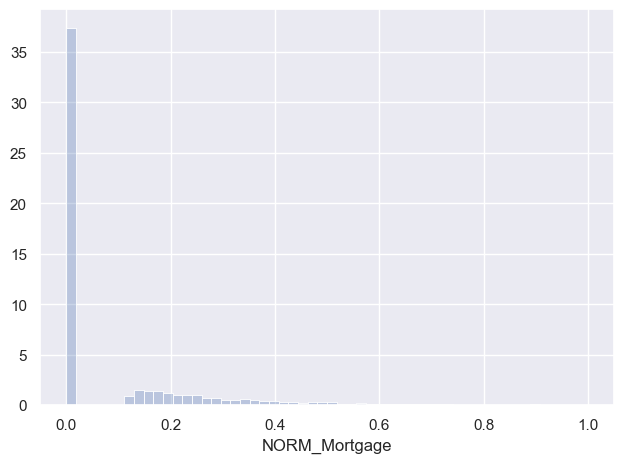

In [197]:
p = so.Plot(df['NORM_Mortgage'])
p2 = p.add(so.Bars(alpha=.3), so.Hist("density"))
p2.add(so.Line(), so.KDE())
p2.show()

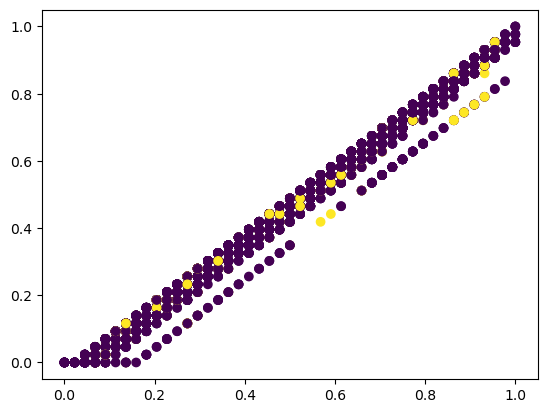

In [198]:
plt.scatter(x=df['AGE_NORM'], y=df['EXP_NORM'],c=df['Personal Loan'])
plt.show()

In [199]:
df['Age_Phase_Experience'] = df['AGE_NORM'] * df['EXP_NORM']



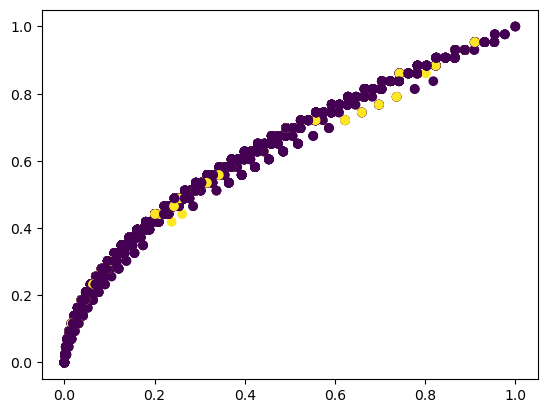

In [200]:
plt.scatter(x=df['Age_Phase_Experience'], y=df['EXP_NORM'],c=df['Personal Loan'])
plt.show()

   ## 3 - 📊 Visualization

In [201]:
print(df['Personal Loan'].value_counts())
100 - (df[df['Personal Loan'] == 1]['Personal Loan'].sum() / 5000 * 100)

0    4520
1     480
Name: Personal Loan, dtype: int64


90.4

### ***90.4%* of people not except the loan that Impalanced data need to have a solustion ❗❗❗❗**

### there are three solution that i know until now:


#### 1 - Choose Proper Evaluation matrix :-
The accuracy of a classifier is the total number of correct predictions by the classifier divided by the total number of predictions.<br> This may be good enough for a well-balanced class but not ideal for the imbalanced class problem.<br> The other metrics such as precision is the measure of how accurate the classifier’s prediction of a specific class and recall <br>is the measure of the classifier’s ability to identify a class.

#### 2 - ReSample The Data :-
**This technique is used to upsample or downsample the minority or majority class.<br>**
**When we are using an imbalanced dataset, we can oversample the minority class using replacement.<br>**
**This technique is called oversampling.<br>**
**Similarly, we can randomly delete rows from the majority class to match them with the minority class which is called undersampling.<br>**
**After sampling the data we can get a balanced dataset for both majority and minority classes.<br>**
**So, when both classes have a similar number of records present in the dataset,<br>**
**we can assume that the classifier will give equal importance to both classes.**

#### 3 - SMOTE :-
**Synthetic Minority Oversampling Technique** or **SMOTE** is another technique to oversample the minority class.<br>
Simply adding duplicate records of minority class often don’t add any new information to the model.<br>
In SMOTE new instances are synthesized from the existing data. <br>
If we explain it in simple words, SMOTE looks into minority class instances and use k nearest neighbor to select a random nearest neighbor,<br> and a synthetic instance is created randomly in feature space..

### we will use SMOTE  🎯

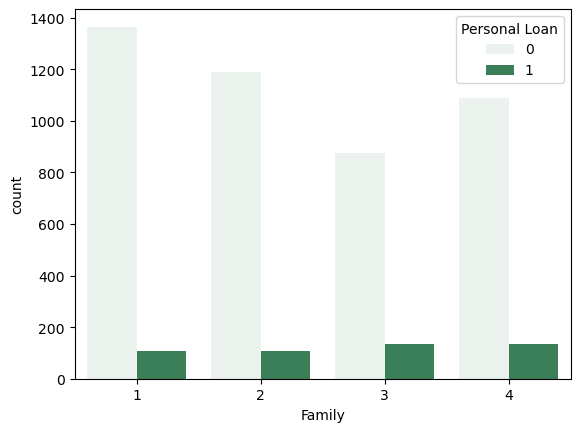

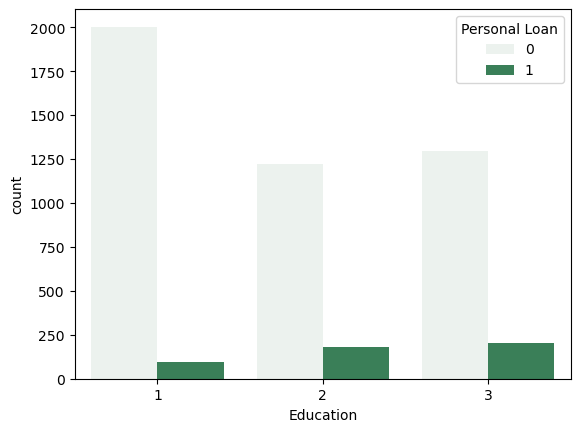

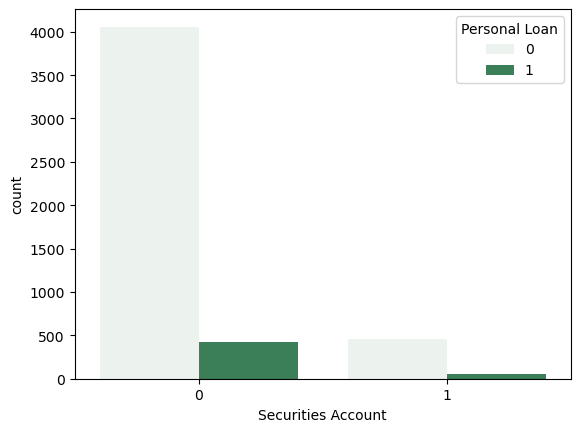

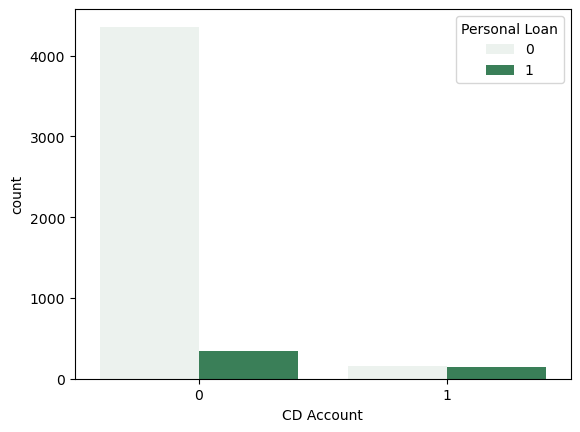

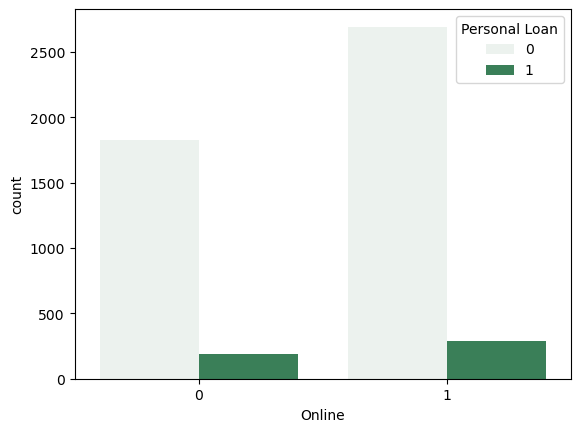

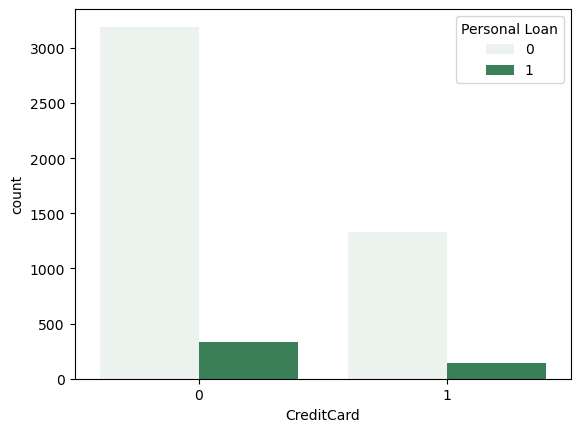

In [202]:
col_cat = df[['Family','Education','Securities Account','CD Account','Online','CreditCard']]

for i in col_cat.columns:
    sns.countplot(x=i, data = df,color = "seagreen",hue = df['Personal Loan'])
    plt.show()

## 4 - 🥵 Heat Map

<Axes: >

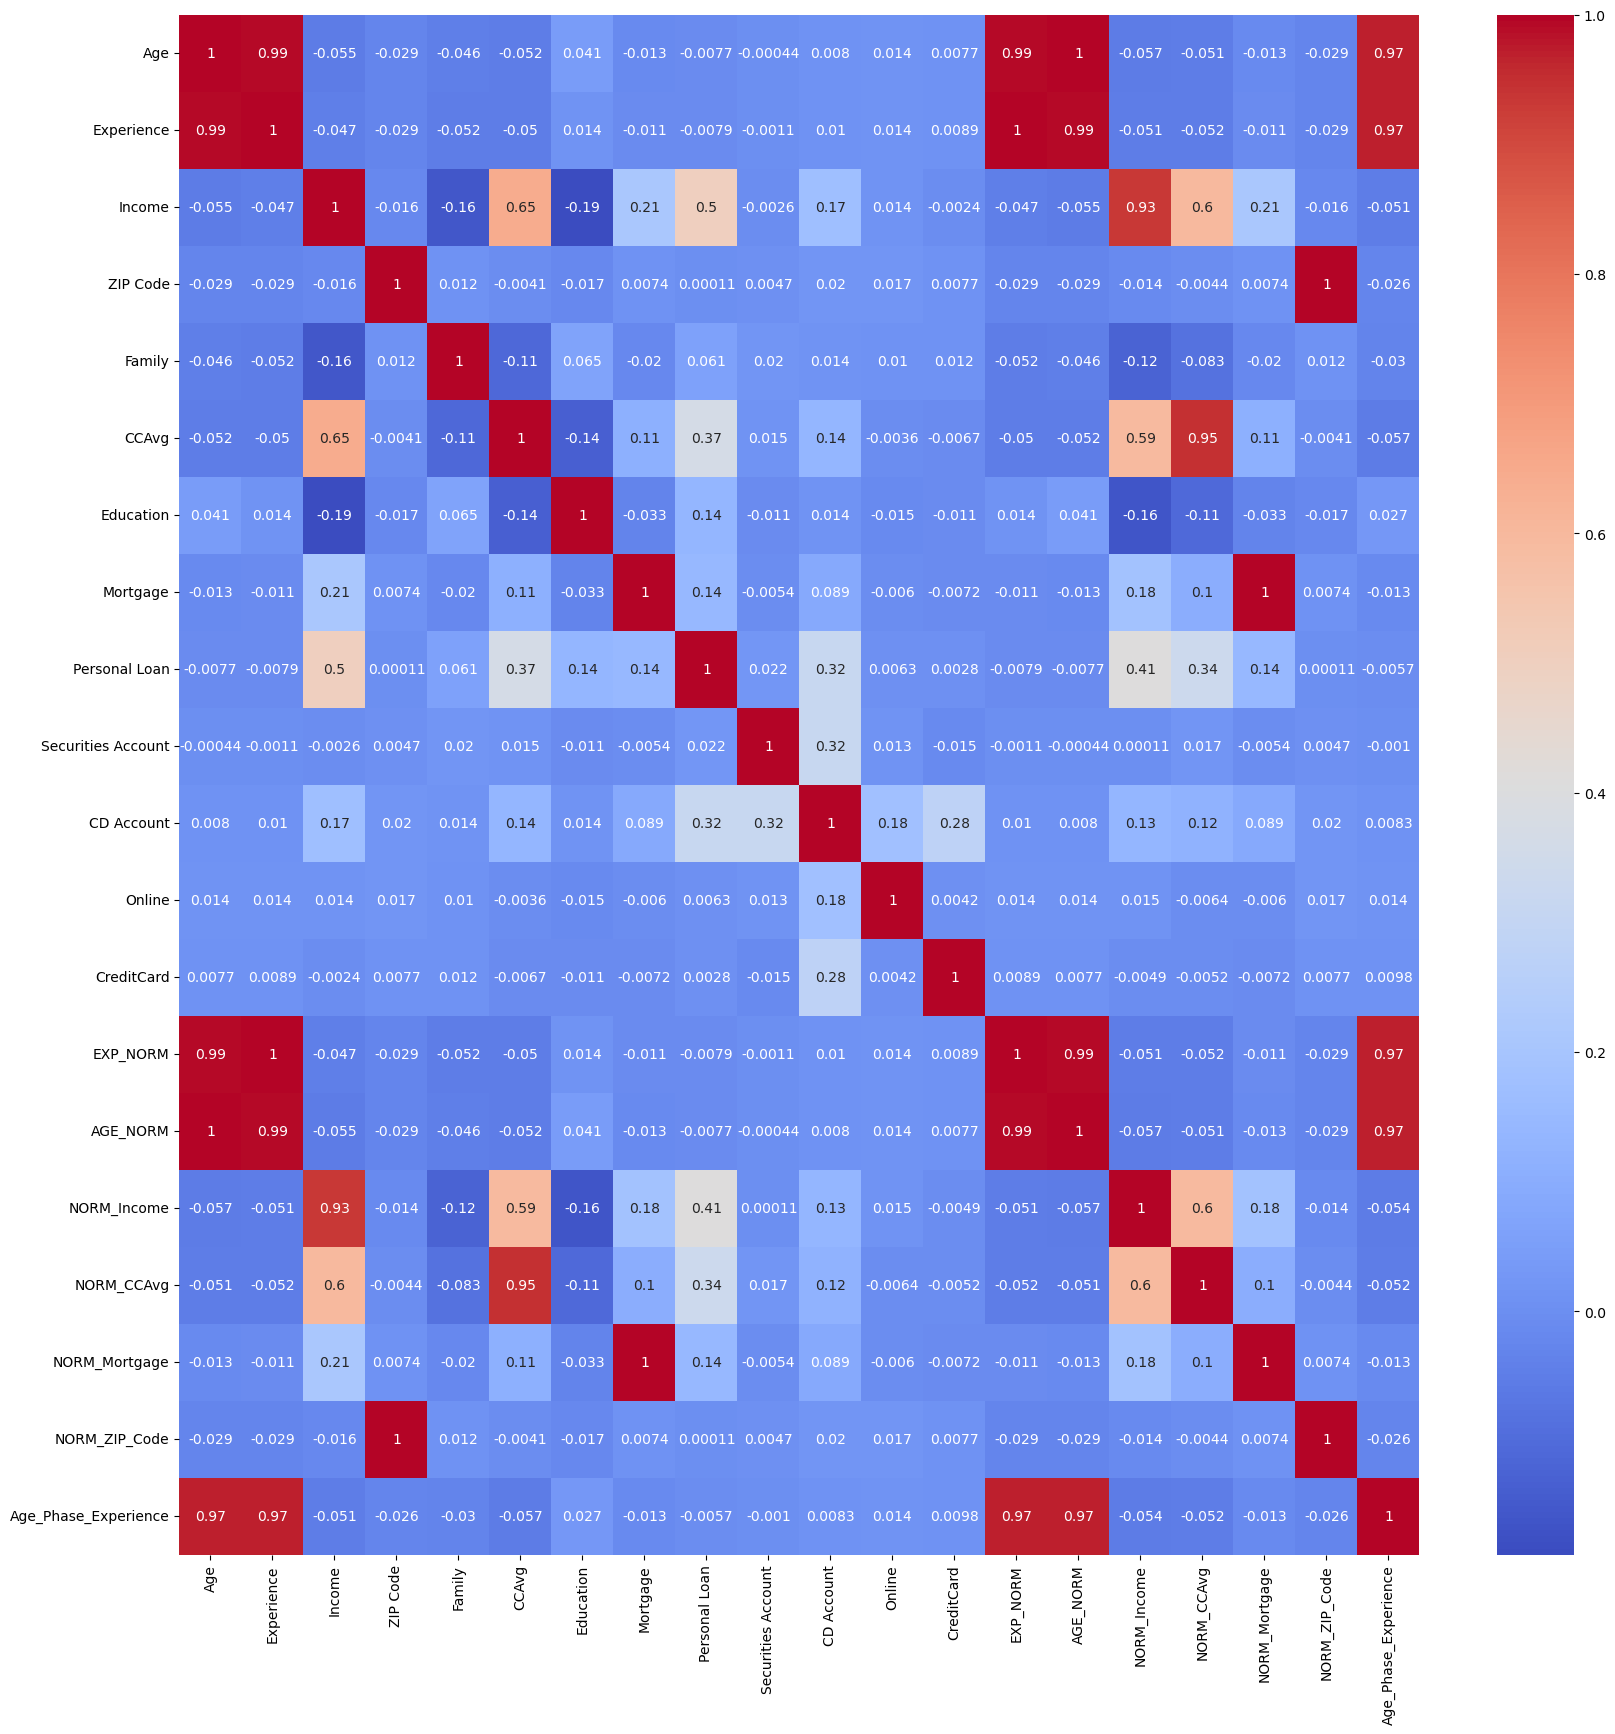

In [203]:
corr = df.corr()
plt.figure(figsize=(df.shape[1],df.shape[1]))
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [204]:
tt = corr['Personal Loan'].mean() * corr['Personal Loan'].std()

corr[ (corr['Personal Loan'] >= tt) | (corr['Personal Loan'] <= -1*tt) ]['Personal Loan'].index

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'CD Account', 'NORM_Income', 'NORM_CCAvg', 'NORM_Mortgage'],
      dtype='object')

In [205]:
df_corr = df[['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'CD Account', 'NORM_Income', 'NORM_CCAvg', 'NORM_Mortgage']]

In [206]:
df_2Fet = df[['Income','CCAvg', 'Personal Loan']]

## 5 - 🎢 Variance Threshold

In [207]:
from sklearn.feature_selection import VarianceThreshold
selctor = VarianceThreshold(threshold=0.1)
selctor.fit_transform(df)
selctor.get_feature_names_out()

array(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Online', 'CreditCard'], dtype=object)

In [208]:
df_var = df[['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Online', 'CreditCard','Personal Loan']]

## 6 - 🎯 SMOTE { KNN }

In [209]:
from collections import Counter
Counter(df['Personal Loan'])

Counter({0: 4520, 1: 480})

In [210]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(df.drop(['Personal Loan'],axis=1), df['Personal Loan'])

In [211]:
Counter(y_sm)

Counter({0: 4520, 1: 4520})

In [212]:
df_sm = x_sm
df_sm['Personal Loan'] = y_sm

In [213]:
corr_sm = df_sm.corr()

In [214]:
tt = corr_sm['Personal Loan'].mean() * corr_sm['Personal Loan'].std()

corr_sm[ (corr_sm['Personal Loan'] >= tt) | (corr_sm['Personal Loan'] <= -1*tt) ]['Personal Loan'].index

Index(['Income', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'NORM_Income', 'NORM_CCAvg',
       'NORM_Mortgage', 'Personal Loan'],
      dtype='object')

In [215]:
df_sm_corr = df_sm[['Income', 'CCAvg', 'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'NORM_Income', 'NORM_CCAvg',
       'NORM_Mortgage', 'Personal Loan']]

## 7 - 🚅 Train

> We have already a 6 data set <br>

1. df
 - 1.1. df_corr
 - 1.2 - df_var
 - 1.3 - df_2Fet
2. df_sm
 - 2.1 - df_sm_corr


In [216]:
# import the models that i will use
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

gnb = GaussianNB()
lg = LogisticRegression(max_iter = 2000)
tree = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=1)
svc = SVC(probability = True)
xgb = XGBClassifier(random_state=1)
model = [gnb,lg,tree,knn,rf,svc,xgb]

In [217]:
def badBunny(df,model):
    data = np.array(df)
    np.random.shuffle(data)
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Personal Loan'],axis=1), df['Personal Loan'], test_size=0.3, random_state=42)
    print("----------------------------------------------------------------------------------")
    print("first the cross validation")
    print("----------------------------------------------------------------------------------")

    for i in model:
        cv = cross_val_score(i,X_train,y_train,cv = 5)
        model_name = type(i).__name__
        print('name : ' + model_name)
        print(cv.mean())
        print('################')
    print("----------------------------------------------------------------------------------")
    print("second the accuracy for predict")
    print("----------------------------------------------------------------------------------")

    for i in model:
        i.fit(X_train,y_train)
        y_pred_t = i.predict(X_train)
        y_pred_s = i.predict(X_test)
        model_name = type(i).__name__
        print('name : ' + model_name)
        accuracy_t = accuracy_score(y_train, y_pred_t)
        print(f"Accuracy for train: {accuracy_t:.2f}")
        accuracy_s = accuracy_score(y_test, y_pred_s)
        print(f"Accuracy for test: {accuracy_s:.2f}")
        print(classification_report(y_test, y_pred_s))
        ConfusionMatrixDisplay.from_estimator(i, X_test, y_test, colorbar=False, cmap='YlOrRd_r')
        plt.grid(False)
        print("+++++++++++++++++==================+++++++++++++++++")


## 1️⃣ df

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8879999999999999
################
name : LogisticRegression
0.9225714285714286
################
name : DecisionTreeClassifier
0.9794285714285715
################
name : KNeighborsClassifier
0.9054285714285715
################


name : RandomForestClassifier
0.9842857142857142
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9828571428571429
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1343
           1       0.49      0.75      0.59       157

    accuracy                           0.89      1500
   macro avg       0.73      0.83      0.77      1500
weighted avg       0.92      0.89      0.90      1500

+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.91
Accuracy for test: 0.90
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
 

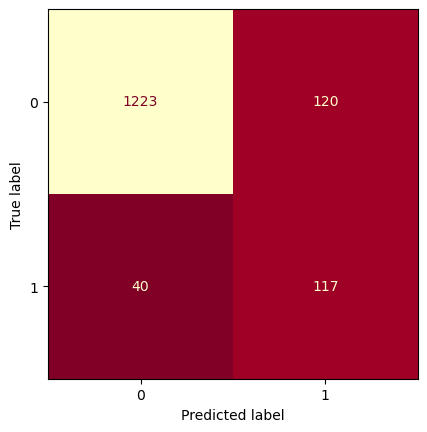

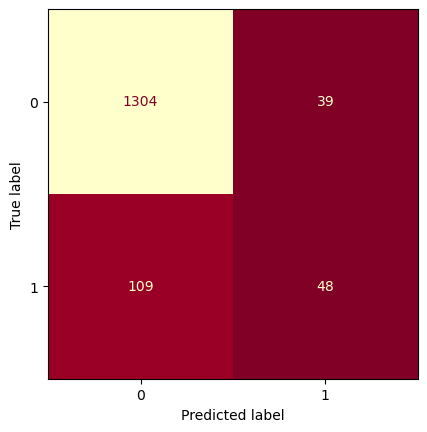

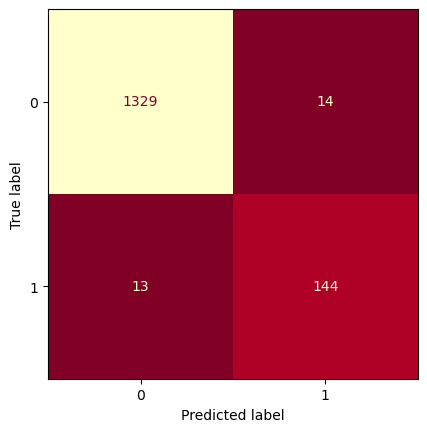

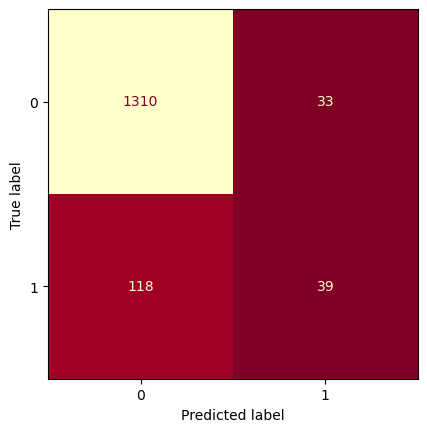

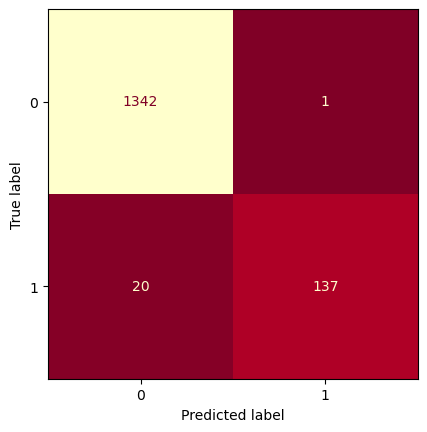

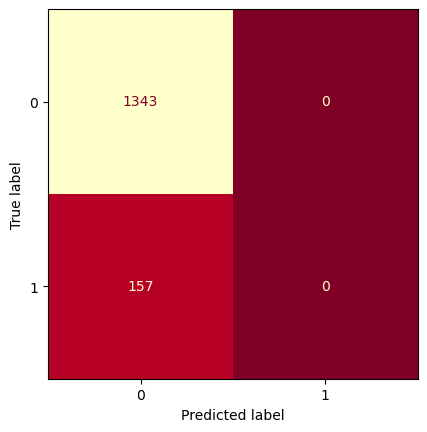

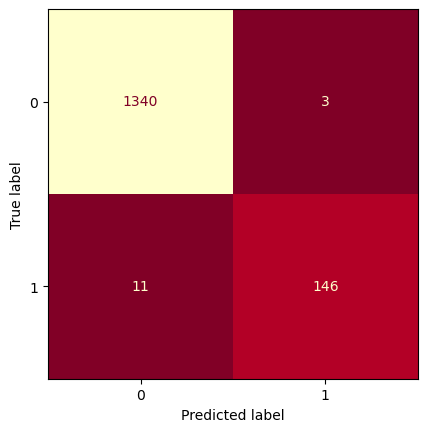

In [218]:
badBunny(df,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.94   	|    0.6   	|
| **Logistic** 	|         91%        	|        90%        	|   0.95   	|   0.39   	|
|   **Tree**   	|        100%        	|        98%        	|   0.99   	|   0.91   	|
|    **KNN**   	|         93%        	|        90%        	|   0.95   	|   0.34   	|
|  **Forest**  	|        100%        	|        99%        	|   0.99   	|   0.93   	|
|    **SVM**   	|         91%        	|        90%        	|   0.94   	|     0    	|
|    **XGB**   	|        100%        	|        99%        	|   0.99   	|   0.95   	|

## 2️⃣ df_2Fet

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8911428571428572
################
name : LogisticRegression
0.9088571428571429
################
name : DecisionTreeClassifier
0.9119999999999999
################
name : KNeighborsClassifier
0.9071428571428571
################
name : RandomForestClassifier
0.9185714285714285
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9205714285714286
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1     

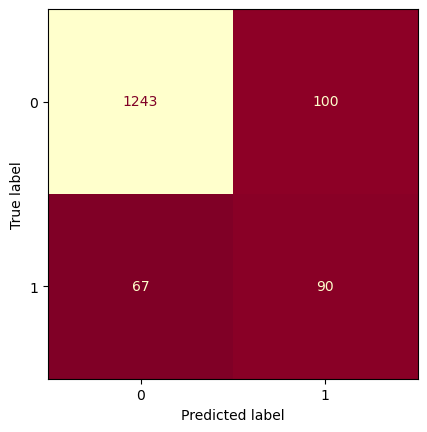

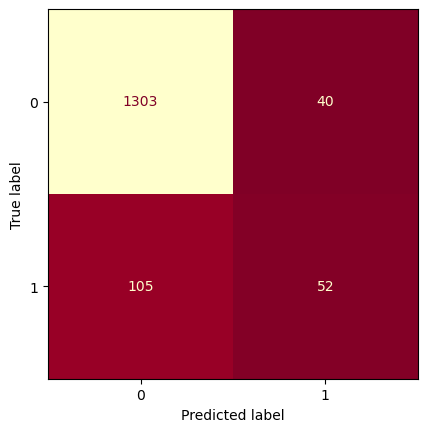

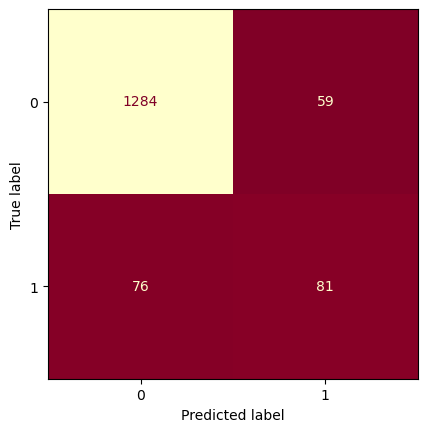

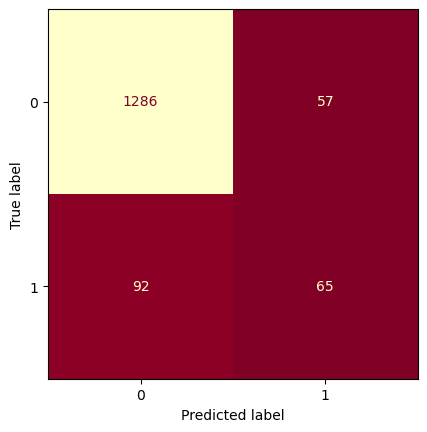

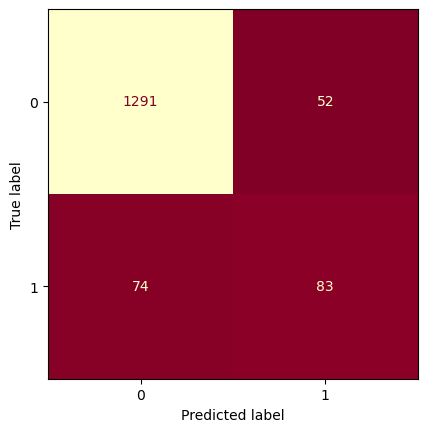

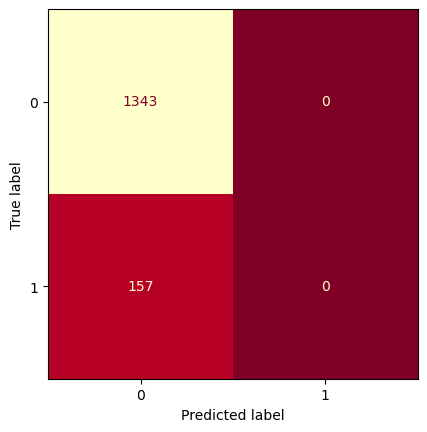

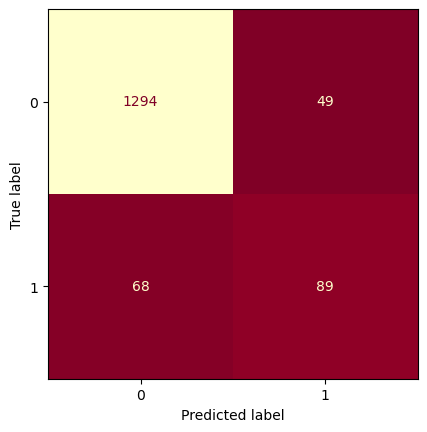

In [219]:
badBunny(df_2Fet,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.94   	|   0.52   	|
| **Logistic** 	|         91%        	|        90%        	|   0.95   	|   0.42   	|
|   **Tree**   	|        100%        	|        98%        	|   0.95   	|   0.55   	|
|    **KNN**   	|         93%        	|        90%        	|   0.95   	|   0.47   	|
|  **Forest**  	|        100%        	|        99%        	|   0.95   	|   0.57   	|
|    **SVM**   	|         91%        	|        90%        	|   0.94   	|     0    	|
|    **XGB**   	|        100%        	|        99%        	|   0.96   	|   0.6   	|

## 3️⃣ df_corr

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8865714285714285
################
name : LogisticRegression
0.9468571428571428
################
name : DecisionTreeClassifier
0.9785714285714284
################
name : KNeighborsClassifier
0.9268571428571428
################
name : RandomForestClassifier
0.9842857142857143
################
name : SVC
0.9085714285714286
################
name : XGBClassifier
0.9825714285714285
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.89
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1343
           1     

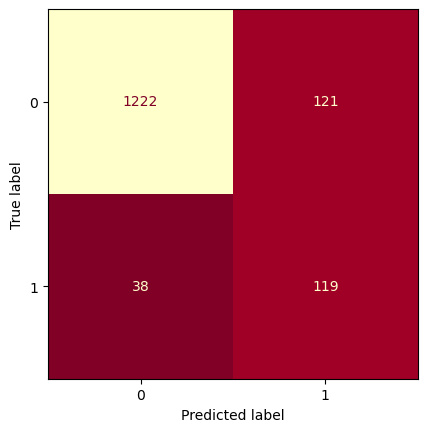

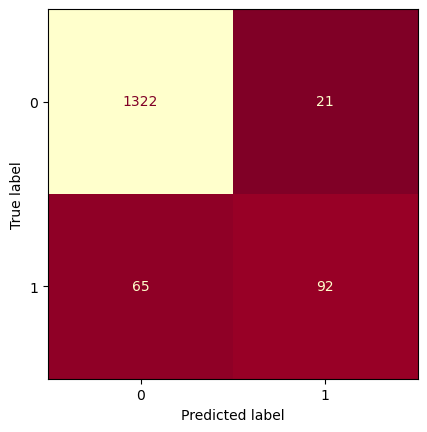

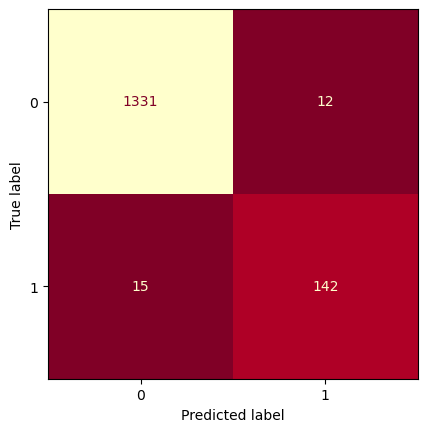

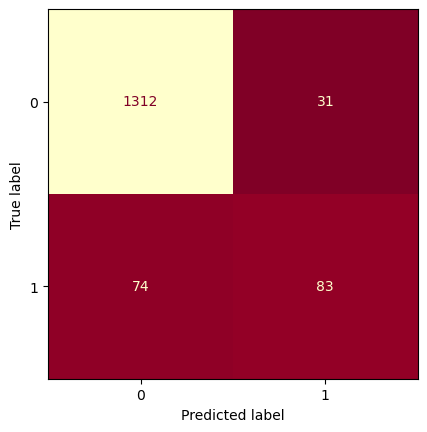

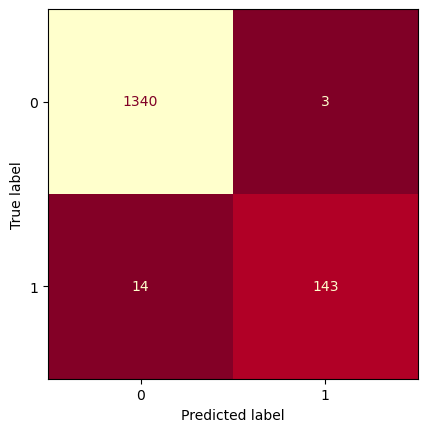

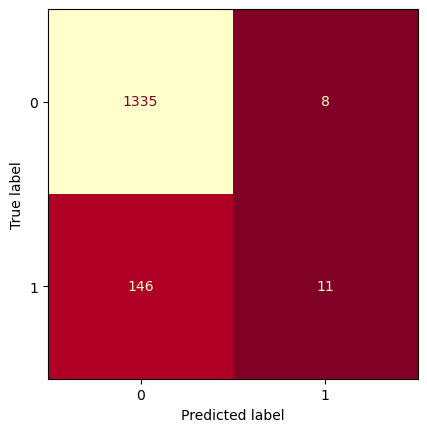

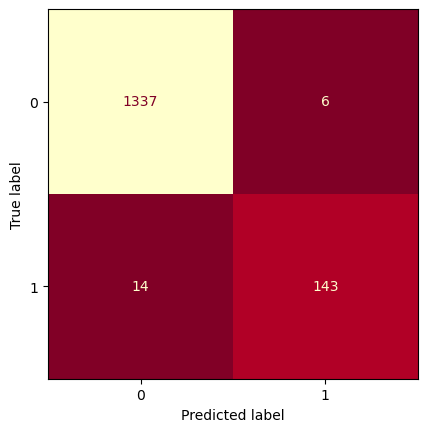

In [220]:
badBunny(df_corr,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.94   	|   0.68   	|
| **Logistic** 	|         91%        	|        90%        	|   0.97   	|   0.91   	|
|   **Tree**   	|        100%        	|        98%        	|   0.99   	|   0.61   	|
|    **KNN**   	|         93%        	|        90%        	|   0.96   	|   0.94   	|
|  **Forest**  	|        100%        	|        99%        	|   0.99   	|   0.94   	|
|    **SVM**   	|         91%        	|        90%        	|   0.95   	|   0.12   	|
|    **XGB**   	|        100%        	|        99%        	|   0.99   	|   0.93   	|

## 4️⃣ df_var

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.9008571428571429
################
name : LogisticRegression
0.9182857142857144
################
name : DecisionTreeClassifier
0.9788571428571429
################
name : KNeighborsClassifier
0.9054285714285715
################
name : RandomForestClassifier
0.982
################
name : SVC
0.9077142857142857
################
name : XGBClassifier
0.9817142857142857
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.90
Accuracy for test: 0.90
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1343
           1       0.53      0

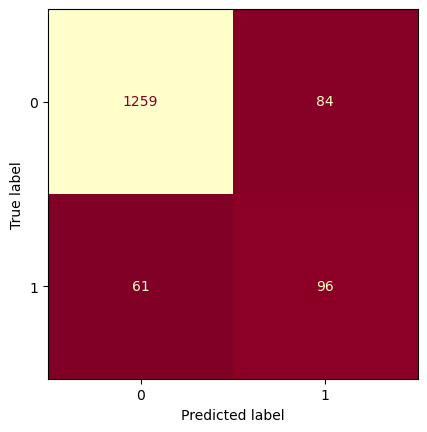

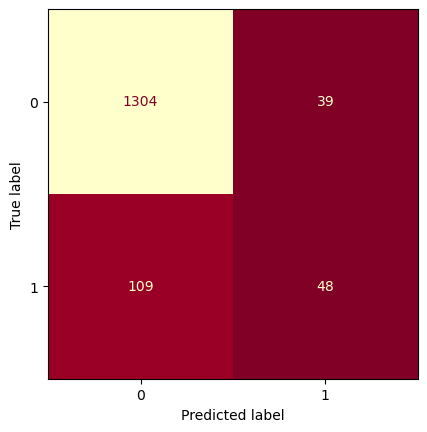

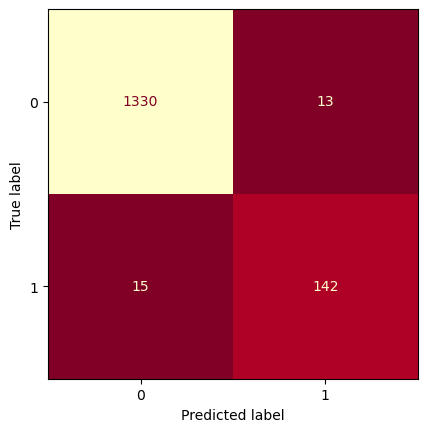

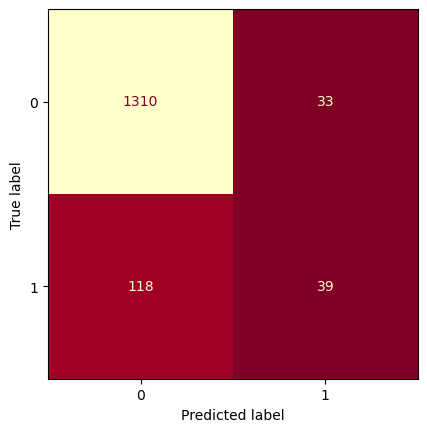

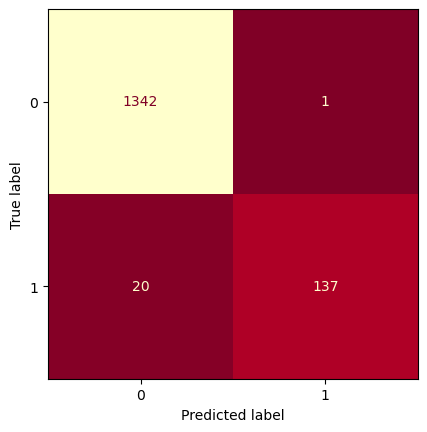

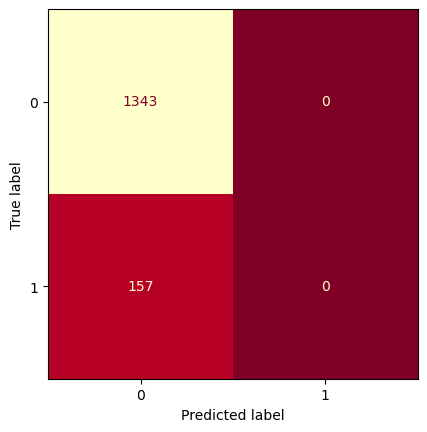

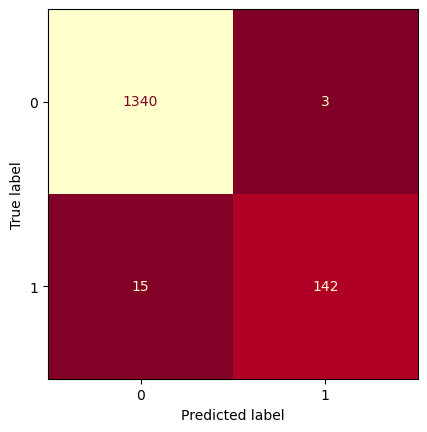

In [221]:
badBunny(df_var,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.95   	|   0.57   	|
| **Logistic** 	|         91%        	|        90%        	|   0.95   	|   0.39   	|
|   **Tree**   	|        100%        	|        98%        	|   0.99   	|   0.91   	|
|    **KNN**   	|         93%        	|        90%        	|   0.95   	|   0.34   	|
|  **Forest**  	|        100%        	|        99%        	|   0.99   	|   0.93   	|
|    **SVM**   	|         91%        	|        90%        	|   0.94   	|     0    	|
|    **XGB**   	|        100%        	|        99%        	|   0.99   	|   0.94   	|

## 5️⃣ df_sm

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8947553840486048
################
name : LogisticRegression
0.8767414095623451
################


name : DecisionTreeClassifier
0.9625475026381682
################
name : KNeighborsClassifier
0.9032861897358085
################
name : RandomForestClassifier
0.9789821978282724
################
name : SVC
0.5042667765643245
################
name : XGBClassifier
0.980878182192833
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.90
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1383
           1       0.88      0.92      0.90      1329

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712

+++++++++++++++++==================+++++++++++++++++
name : LogisticRegression
Accuracy for train: 0.88
Accur

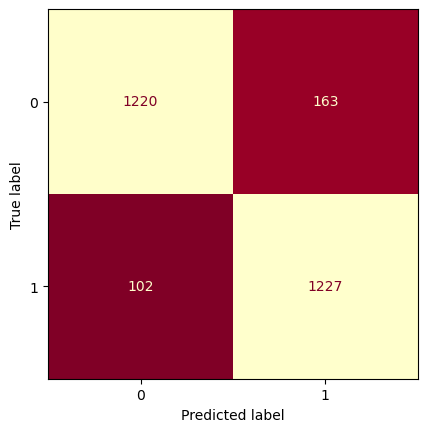

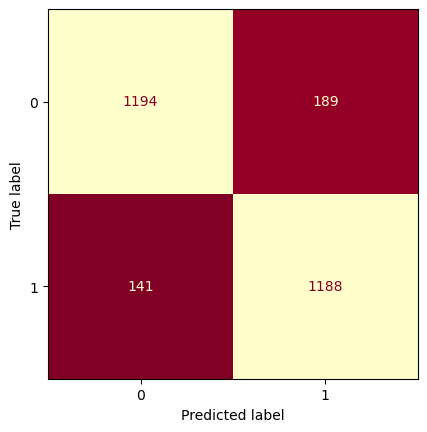

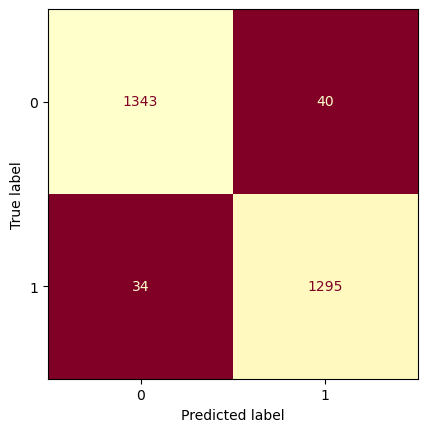

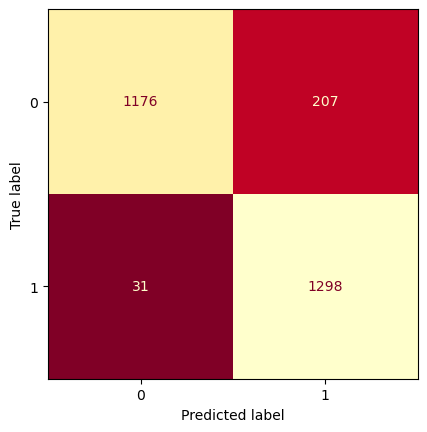

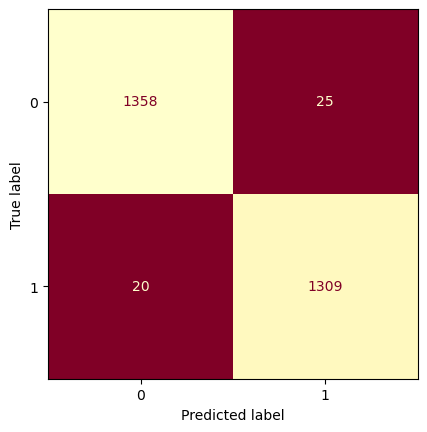

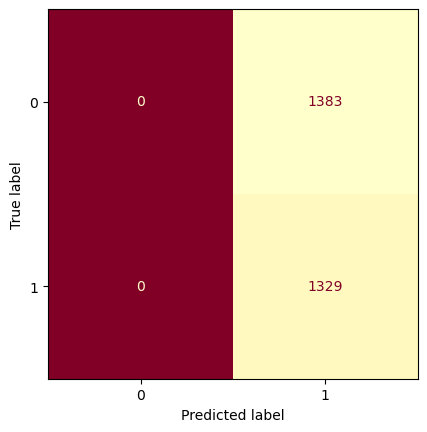

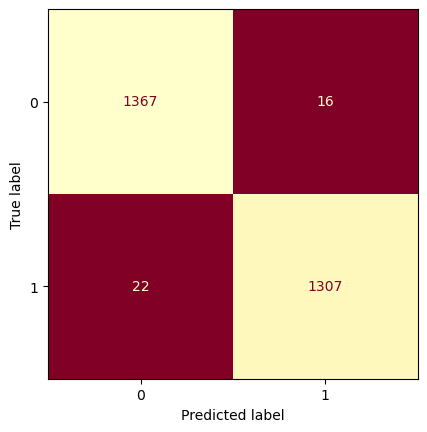

In [222]:
badBunny(df_sm,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.90   	|   0.90   	|
| **Logistic** 	|         91%        	|        90%        	|   0.88   	|   0.88  	|
|   **Tree**   	|        100%        	|        98%        	|   0.97   	|   0.97   	|
|    **KNN**   	|         93%        	|        90%        	|   0.91   	|   0.92   	|
|  **Forest**  	|        100%        	|        99%        	|   0.98   	|   0.98   	|
|    **SVM**   	|         91%        	|        90%        	|   0.00   	|   0.00    |
|    **XGB**   	|        100%        	|        99%        	|   0.99   	|   0.99   	|

## 6️⃣ df_sm_corr

----------------------------------------------------------------------------------
first the cross validation
----------------------------------------------------------------------------------
name : GaussianNB
0.8941222236791987
################
name : LogisticRegression
0.9021812187400483
################
name : DecisionTreeClassifier
0.9348932556556706
################
name : KNeighborsClassifier
0.9059754353758063
################
name : RandomForestClassifier
0.9535405153950384
################
name : SVC
0.8846404286008654
################
name : XGBClassifier
0.9713975110678181
################
----------------------------------------------------------------------------------
second the accuracy for predict
----------------------------------------------------------------------------------
name : GaussianNB
Accuracy for train: 0.89
Accuracy for test: 0.90
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1383
           1     

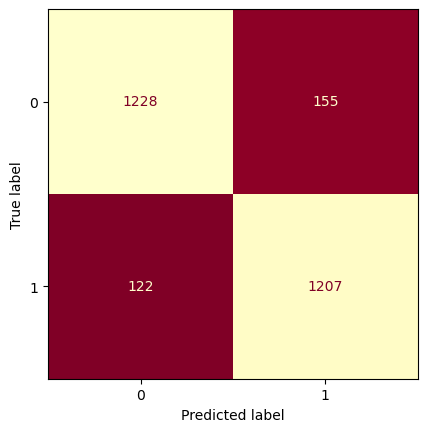

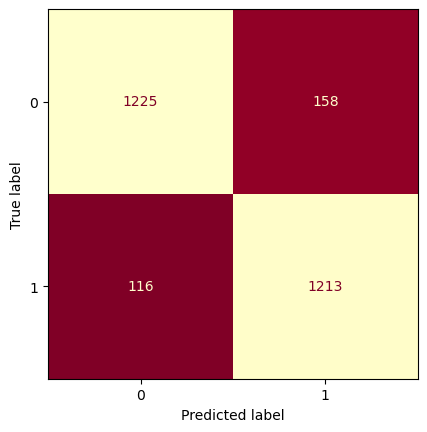

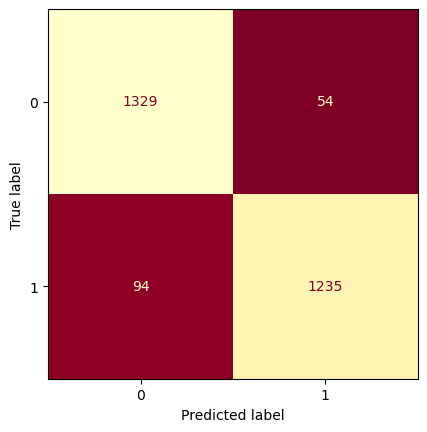

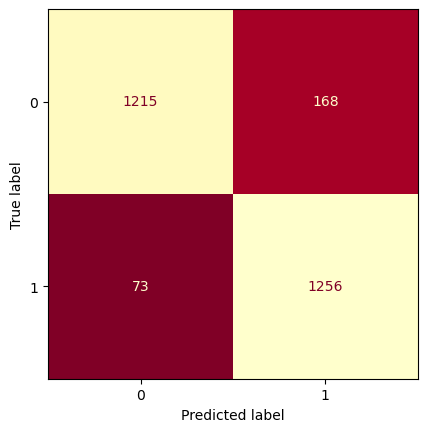

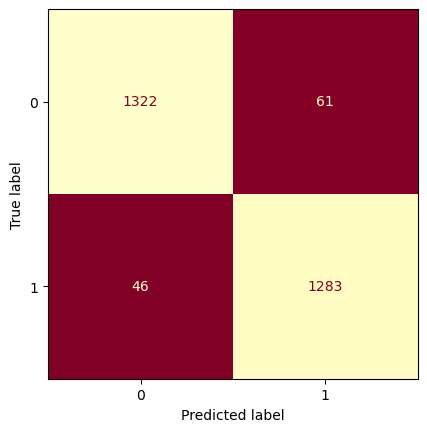

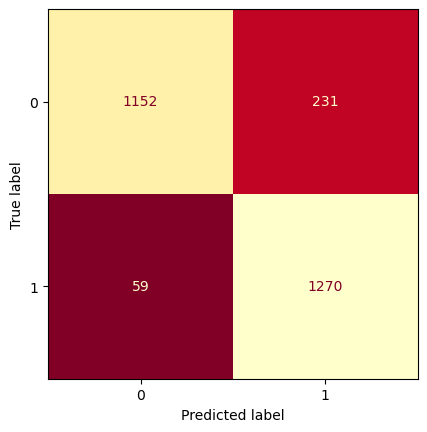

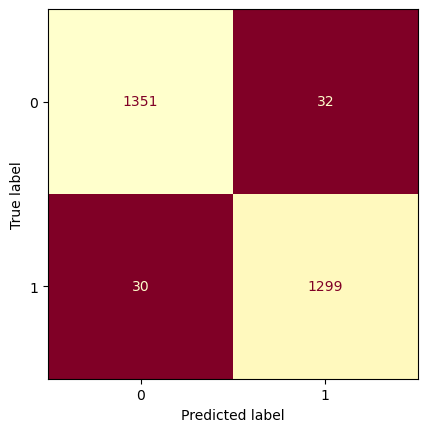

In [223]:
badBunny(df_sm_corr,model)

|   **model**  	| **Train Accuracy** 	| **Test Accuracy** 	| **F1-0** 	| **F1-1** 	|
|:------------:	|:------------------:	|:-----------------:	|:--------:	|:--------:	|
| **Gaussian** 	|         89%        	|        89%        	|   0.90   	|   0.90   	|
| **Logistic** 	|         91%        	|        90%        	|   0.90   	|   0.90  	|
|   **Tree**   	|        100%        	|        98%        	|   0.95   	|   0.94   	|
|    **KNN**   	|         93%        	|        90%        	|   0.91   	|   0.91   	|
|  **Forest**  	|        100%        	|        99%        	|   0.96   	|   0.98   	|
|    **SVM**   	|         91%        	|        90%        	|   0.98   	|   0.90    |
|    **XGB**   	|        100%        	|        99%        	|   0.98   	|   0.98   	|

In [224]:
m, n = df_sm_corr.shape
print(m,n)

9040 12


#### ✨✨F1-score ✨✨

#### ✨✨data set best choise until now is the **DataFrame** who has ***SMOT*** generize more accurate✨✨

# 🍘 Bulid Neural Network Model

In [225]:
def init_param():
    w1 = np.random.rand(255,11) - 0.5
    b1 = np.random.rand(255,1) - 0.5
    w2 = np.random.rand(2,255) - 0.5
    b2 = np.random.rand(2,1) - 0.5
    return w1, b1, w2, b2

def ReLU(z):
    return np.maximum(0,z)

def deriv_ReLU(z):
    return z > 0

def SoftMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(w1,b1,w2,b2,x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = SoftMax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros(( y.size, y.max()+1 ))
    one_hot_y[np.arange(y.size),y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def backward_prop(z1, a1, z2, a2, w2, x, y):
    one_hot_y = one_hot(y)

    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)

    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1/m * dz1.dot(x.T)
    db1 = 1/m * np.sum(dz1)

    return dw1, db1, dw2, db2

def update(w1,b1,w2,b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

def get_predictions(a):
    return np.argmax(a,0)

def get_accuracy(a,y):
    return np.sum(a == y) / y.size

def gradint_descent(x,y,iterations, alpha):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2  = forward_prop(w1, b1, w2, b2,x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update(w1,b1,w2,b2, dw1, db1, dw2, db2, alpha)
        if i % 50 == 0:
            print(f"iteration: {i}")
            print(f"Accuracy: { get_accuracy( get_predictions( a2 ), y ) }")
    return w1,b1,w2,b2

In [226]:
df_sm_corr_tf = df_sm_corr.copy()
df_sm_corr_tf['Income'] = df_sm_corr_tf['Income'] / df_sm_corr_tf['Income'].max()
df_sm_corr_tf['Education'] = df_sm_corr_tf['Education'] / df_sm_corr_tf['Education'].max()
df_sm_corr_tf['Mortgage'] = df_sm_corr_tf['Mortgage'] / df_sm_corr_tf['Mortgage'].max()
df_sm_corr_tf['CCAvg'] = df_sm_corr_tf['CCAvg'] / df_sm_corr_tf['CCAvg'].max()

In [227]:
df_sm_corr_tf.shape

(9040, 12)

In [243]:
x_train = np.array(df_sm_corr_tf.drop(['Personal Loan'],axis=1))
y_train = np.array(df_sm_corr_tf['Personal Loan'])

m, n = x_train.shape
np.random.shuffle(x_train) # shuffle before splitting into dev and training sets
y_train = np.int64(y_train)
t = 2000
data_dev_x = x_train[0:t].T
data_dev_y = y_train[0:t].T

X_train = x_train[t:m].T
Y_train = y_train[t:m]

In [244]:
print(f"the shape of X_dev is { data_dev_x.shape }")
print(f"the shape of Y_dev is { data_dev_y.shape }")
print(f"the shape of X_train is { X_train.shape }")
print(f"the shape of Y_train is { Y_train.shape }")

the shape of X_dev is (11, 2000)
the shape of Y_dev is (2000,)
the shape of X_train is (11, 7040)
the shape of Y_train is (7040,)


In [245]:
w1,b1,w2,b2 = gradint_descent(X_train,Y_train,1000,0.3)

iteration: 0
Accuracy: 0.6134943181818182
iteration: 50
Accuracy: 0.5813920454545455
iteration: 100
Accuracy: 0.6
iteration: 150
Accuracy: 0.6049715909090909
iteration: 200
Accuracy: 0.6073863636363637
iteration: 250
Accuracy: 0.6078125
iteration: 300
Accuracy: 0.6082386363636364
iteration: 350
Accuracy: 0.6086647727272727
iteration: 400
Accuracy: 0.6089488636363637


KeyboardInterrupt: 

In [231]:
#import tensorflow as tf

In [232]:
#X_train, X_test, y_train, y_test = train_test_split(df_sm_corr_tf.drop(['Personal Loan'],axis=1), df_sm_corr_tf['Personal Loan'], test_size=0.3, random_state=42)

In [233]:
# model = tf.keras.models.Sequential([
#     tf.keras.Input(shape=(11,)),
#     tf.keras.layers.Dense(216,activation='relu',name='l1'),
#     tf.keras.layers.Dense(1,activation='softmax',name='out')
# ])

In [234]:
#model.summary()

In [235]:
# model.compile(
#     loss = tf.keras.losses.BinaryCrossentropy(),
#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.03),
# )

# model.fit(X_train,y_train,epochs=50)

In [236]:
# pred = model.predict(X_test)

In [237]:
# pred

In [238]:
# accuracy_s = accuracy_score(y_test, pred)
# print(f"Accuracy for test: {accuracy_s:.2f}")

## 8 - 🐇 Observations 🎆

the data is impaleced and that bring a problem in over fitting where the model train thet he could predict all as 0 and the model still give us biggist accuracy,
for the feature all of them in our view is important but there are specific 2 columns that we could dependent on them only,
the income and ccAVG, wich also mortage, that colmns have the most effect that the person take loan or not, and the cheallange was in the imbalanced data we use SMOTE technique for generate a data by knn that are like the over sampling, and that give a usefull way to make model, we didn't have to make tuning the model is at itt's best,
we didn't look at score as like as we most concert on f1 score and what is predictied, we want to make it generalization as could we can, but after all that the neural network was has a new theory that she also predictid all as 1 not a 0 and that we was wait for no it's 1 and we don't know how, there are some analysis that show you how to target the coustmure for accept the loan

---
Title :
  - Personal Loan
  
Author :

  - "Mohamed Hossam"
  - "Mahmoud Hassan"
  - "Ahmed Mokhtar"

Date :
  - 29 - 8 - 2023<br>
---

In [239]:
X_train, X_test, y_train, y_test = train_test_split(df_sm_corr.drop(['Personal Loan'],axis=1), df_sm_corr['Personal Loan'], test_size=0.3, random_state=42)

In [240]:
xgb.fit(X_train,y_train)
y_pred_t = xgb.predict(X_train)
y_pred_s = xgb.predict(X_test)
accuracy_t = accuracy_score(y_train, y_pred_t)
print(f"Accuracy for train: {accuracy_t:.2f}")
accuracy_s = accuracy_score(y_test, y_pred_s)
print(f"Accuracy for test: {accuracy_s:.2f}")
print(classification_report(y_test, y_pred_s))

Accuracy for train: 1.00
Accuracy for test: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1383
           1       0.98      0.98      0.98      1329

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



In [241]:
import joblib

joblib_file = "Personal_loan_model"
joblib.dump(xgb,joblib_file)

loaded_model = joblib.load(open(joblib_file,'rb'))

pred = loaded_model.predict(X_test)

result = np.round(accuracy_score(y_test, pred),2)
print(result)


0.98


In [247]:
df.head(10
    )

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EXP_NORM,AGE_NORM,NORM_Income,NORM_CCAvg,NORM_Mortgage,NORM_ZIP_Code,Age_Phase_Experience
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,0.023256,0.045455,0.532732,0.398479,0.000000,0.936527,0.001057
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0.441860,0.500000,0.421925,0.382123,0.000000,0.924872,0.220930
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,0.348837,0.363636,0.089373,0.289065,0.000000,0.977892,0.126850
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.209302,0.272727,0.751162,0.545617,0.000000,0.970931,0.057082
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,0.186047,0.272727,0.506828,0.289065,0.000000,0.939080,0.050740
5,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,0.302326,0.318182,0.374035,0.140320,0.244094,0.948136,0.096195
6,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,0.627907,0.681818,0.650300,0.382123,0.000000,0.943442,0.428118
7,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,0.558140,0.613636,0.291490,0.109414,0.000000,0.968996,0.342495
8,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,0.232558,0.272727,0.686418,0.196007,0.163780,0.924872,0.063425
9,34,9,180,93023,1,8.9,3,0,1,0,0,0,0,0.209302,0.250000,0.932398,0.956061,0.000000,0.958463,0.052326
